<a href="https://colab.research.google.com/github/SushanthikPoreddy/data690_sushanthik/blob/main/assignment_06/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 06
- *Name:* Sushanthik Reddy

Note:
For visualization, you should use Plotly Express
Use use this notebook as your template and follow the instructions
The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

The links to the zip file is:

https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources (The page containing link to the zip file)

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip (The link to download the zip file)

You can upload the zip file there or run !wget command to retrieve it directly, then run !unzip command to extract files.

You can also unzip and upload individual files to Colab.

Your folder structure should look like this in your Colab enviroment:

- assignment_07.ipynb
- raw_data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
        - ...

In [3]:
!wget https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip

--2021-10-14 16:45:41--  https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_01192021.zip
Resolving ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)... 15.205.92.235, 15.200.243.39, 2600:1f12:18a:7d01:29c7:6ff5:8ad8:c8f0, ...
Connecting to ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)|15.205.92.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385541173 (368M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data_01192021.zip’

CollegeScorecard_Ra 100%[===================>] 367.68M  35.4MB/s    in 11s     

2021-10-14 16:45:53 (32.1 MB/s) - ‘CollegeScorecard_Raw_Data_01192021.zip’ saved [385541173/385541173]



In [4]:
!unzip CollegeScorecard_Raw_Data_01192021.zip

Archive:  CollegeScorecard_Raw_Data_01192021.zip
   creating: Raw Data Files/
  inflating: Raw Data Files/MERGED2011_12_PP.csv  
  inflating: Raw Data Files/MERGED1999_00_PP.csv  
  inflating: Raw Data Files/MERGED2006_07_PP.csv  
  inflating: Raw Data Files/MERGED2014_15_PP.csv  
  inflating: Raw Data Files/Most-Recent-Cohorts-All-Data-Elements.csv  
  inflating: __MACOSX/Raw Data Files/._Most-Recent-Cohorts-All-Data-Elements.csv  
  inflating: Raw Data Files/MERGED2003_04_PP.csv  
  inflating: Raw Data Files/MERGED1996_97_PP.csv  
  inflating: Raw Data Files/FieldOfStudyData1516_1617_PP.csv  
  inflating: Raw Data Files/Most-Recent-Cohorts-Field-of-Study.csv  
  inflating: Raw Data Files/MERGED2012_13_PP.csv  
  inflating: Raw Data Files/MERGED2005_06_PP.csv  
  inflating: Raw Data Files/MERGED2009_10_PP.csv  
  inflating: Raw Data Files/FieldOfStudyData1617_1718_PP.csv  
  inflating: Raw Data Files/MERGED2018_19_PP.csv  
  inflating: Raw Data Files/MERGED2017_18_PP.csv  
  inflating

## 1.Import libraries

In [5]:
import os
import pandas as pd
import plotly.graph_objects as go

## <2> 
## Display the current workin directory using os.getcwd()
## you would need to import a standard Python library called os which stands for operating system,
## so place that import statement in the previous cell.
## Since your notebook and your data files are not in # the same folder, 
## you want to make sure what is the current working folder and 
## how to access a data file in a different folder

In [6]:
directory = os.getcwd()
directory

'/content'

## <3> 
## os library has a method call listdir which generates a list of files in a directory/folder.
## use this method to assign the contents (list of file names) of the data folder to a variable and display it.
## You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

In [8]:
path = directory + '/Raw Data Files/'
directory_data = os.listdir(path)
directory_data.sort()
directory_data

['Crosswalks.zip',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'Most-Recent-Cohorts-All-Data-Elements.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'data.yaml']

## <4> 
## The folder contains files that are not the yearly data files
## write code to remove the unwanted files from the list variable 
## Note: don't remove/delete these files from the folder in your drive
## For example, use the file extension to only keep the csv files 
## or use the name patter - data file name begins with "MERGED"
## You can use the concept of list comprehension to write just 
## one line of code as well as using a for loop, your choice.

In [10]:
files = []
for file in directory_data:
  if "MERGED" in file:
    files.append(file)
print(files)


['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2018_19_PP.csv']


## <5> 
## Now that you have a clean list of the yearly files, you want to loop through them
## and read them into a dataframe one at a time. You only load six columns: 
## ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
## You should use "usecols" option of Pandas to avoid reading unwanted columns.
## You also want to add a new column call "YEAR" to differentiate the data frames from each other.
## The YEAR variable should be yyyy format so tht you can convert them into integer.
## if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
## if you use scatter plot, the YEAR needs to be converted to integer or float. 
## 
## You would use an empty list and append the yearly dataframes to the list.
## After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
## new single data frame.
## Note: this exercise incorporates many techques we learned before
## - list (creating an empty, append an item to the list)
## - for loop 
## - read only the needed columns from a file (using usecols option)
## - add a new column to a data frame
## - concatenate multiple dataframes into a single one
## This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

In [11]:
list = []
for filename in files:
    df1 = pd.read_csv(path + filename, usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df1['YEAR'] = filename[6:10]
    list.append(df1)
df = pd.concat(list)
df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996
...,...,...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018


## <6> 
## explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

In [12]:
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  163331
Number of Columns:  7


In [13]:
df.info() # general summary of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44912 non-null   float64
 5   TUITIONFEE_IN  79195 non-null   float64
 6   YEAR           163331 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 10.0+ MB


In [14]:
df.head() # show first five rows

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [15]:
df.tail() # show last five rows

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [16]:
df.sample(5) # randomly sample 5 data points

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
445,118286,Brightwood College-Vista,CA,8.0,NaN,NaN,2005
4204,245652,St. John's College,NM,6.0,0.8136,49644.0,2015
5634,428392,Klamath Community College,OR,8.0,NaN,2550.0,2007
1326,143163,Barat College,IL,3.0,NaN,NaN,1996
7558,19554401,St. Joseph's College Long Island,NY,2.0,NaN,22830.0,2014


In [17]:
# isna() is a function that is used to find all the null values of the dataset.
# .any(axis=1) axis=1 (or axis='columns') is vertical axis. To take it further,
#if you use pandas method drop, to remove columns or rows, 
#if you specify axis=1 you will be removing columns. If you specify axis=0 you will be removing rows from dataset.
 
df[df.isna().any(axis=1)] # find and display any missing(null) data

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996
...,...,...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018


In [19]:
# describe() is used to get the statistics of the columns that are present in the dataframe. 
# In this case only two columns of the dataframe were considered and the remaining were not considered because they donot contain numerical data.

df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


## <7>
## the dataframe contains many years of data of all U.S. colleges.
## let's just look at UMBC
## filter/query the dataframe to retrieve only rows that belong to UMBC
## save the UMNC data to a new data frame. using a new variable 
## so that the old big data frame is still available for later use.

In [20]:
df2 = pd.DataFrame()
x = df.loc[df["INSTNM"].str.contains('University of Maryland-Baltimore County')]
df3= df2.append(x)
df3 


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


## <8>
## Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

In [21]:
df3.shape

(23, 7)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2151 to 1415
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   YEAR           23 non-null     object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ KB


In [23]:
df3.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [24]:
df3.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [25]:
df3.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1660,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1694,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004


In [26]:
df3[df3.isna().any(axis=1)] # find and display any missing(null) data

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [27]:
df3.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


## <9> 
## Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

In [29]:
fig = go.Figure()

trace_umbc = go.Bar(
    x=df3["YEAR"],
    y=df3["TUITIONFEE_IN"]
)
fig.add_trace(trace_umbc)

fig.update_layout(
    title="UMBC",
    xaxis={"title":"year"},
    yaxis={"title":"instate tution fee"}
)


fig.show()


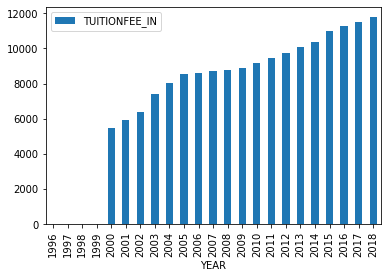

In [51]:
df3=df3.sort_values(by='YEAR')
df3.plot(x="YEAR", y=["TUITIONFEE_IN"], kind="bar")

## <10> 
## Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

In [30]:
fig = go.Figure()

trace_umbc = go.Line(
    x=df3["YEAR"],
    y=df3["TUITIONFEE_IN"]
)
fig.add_trace(trace_umbc)

fig.update_layout(
    title="UMBC",
    xaxis={"title":"year"},
    yaxis={"title":"instate tution fee"}
)


fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




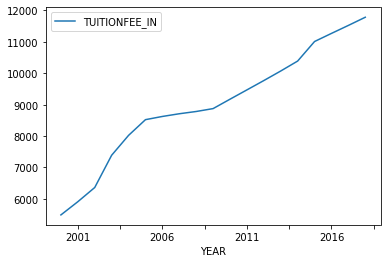

In [52]:
df3=df3.sort_values(by='YEAR')
df3.plot(x="YEAR", y=["TUITIONFEE_IN"], kind="line")

## <11>
## Now let's look at the tuition growth rate year over year
## We need to calculate UMBC tuition change percentage each year
## First convert the TUITIONFEE_IN column to a Python List

In [31]:
umbc_tuition = df3['TUITIONFEE_IN'].tolist()
umbc_tuition

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

## Loop through the list and calculate the % change each year over the prior year
## This takes some effort. Not hard, just some abstract/logical thinking and some experiments
## Have fun on this one

In [32]:
old_tuition = 0
tuition_diff = []
for fee in umbc_tuition:
    if fee == fee:
        if old_tuition == 0:
            old_tuition = fee
        umbc_pctchange = ((fee - old_tuition)/old_tuition) * 100
        tuition_diff.append(umbc_pctchange)
    else:
        tuition_diff.append(fee)
    old_tuition = fee

tuition_diff

[nan,
 nan,
 nan,
 nan,
 nan,
 7.650273224043716,
 7.648054145516074,
 16.12700408676517,
 8.554412560909583,
 6.234413965087282,
 1.1971830985915493,
 0.9974483878450475,
 0.8268259072117593,
 1.0478359908883828,
 3.370153291253381,
 3.227565151019518,
 3.1372134783986483,
 3.11347808275297,
 3.1386571315057608,
 5.989984591679507,
 2.344175904052335,
 2.254971590909091,
 2.2573363431151243]

## The resulting number has many decimal points which are unnecessary and not visually appealing.
## Round up the percentage to two decimal points
## You can use for loop. Or better, use list comprehension for simplicity/brevity

In [33]:
tuition_diff = [round(pctchange, 2) for pctchange in tuition_diff]
tuition_diff

[nan,
 nan,
 nan,
 nan,
 nan,
 7.65,
 7.65,
 16.13,
 8.55,
 6.23,
 1.2,
 1.0,
 0.83,
 1.05,
 3.37,
 3.23,
 3.14,
 3.11,
 3.14,
 5.99,
 2.34,
 2.25,
 2.26]

## Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
## Not as hard as you may think. If you get stuck, you think too hard. 
## Google it and you will find the answer.

In [34]:
df3['PCT_CHANGE'] = tuition_diff
df3

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


## Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

In [35]:
fig = go.Figure()

trace_umbc = go.Bar(
    x=df3["YEAR"],
    y=df3["PCT_CHANGE"]
)
fig.add_trace(trace_umbc)

fig.update_layout(
    title="UMBC",
    xaxis={"title":"year"},
    yaxis={"title":"percentage growth"}
)


fig.show()


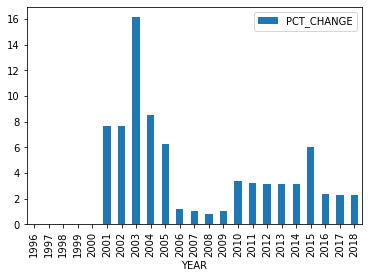

In [54]:
df3=df3.sort_values(by='YEAR')
df3.plot(x="YEAR", y=["PCT_CHANGE"], kind="bar")

In [36]:
fig = go.Figure()

trace_umbc = go.Line(
    x=df3["YEAR"],
    y=df3["PCT_CHANGE"]
)
fig.add_trace(trace_umbc)

fig.update_layout(
    title="UMBC",
    xaxis={"title":"year"},
    yaxis={"title":"percentage growth"}
)


fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




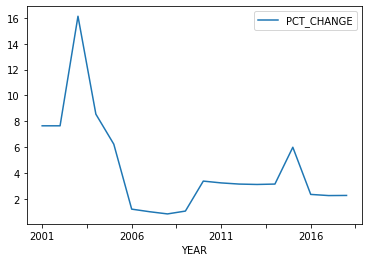

In [55]:
df3=df3.sort_values(by='YEAR')
df3.plot(x="YEAR", y=["PCT_CHANGE"], kind="line")

## <12>
## Since we want to do the same calculation for JHU. 
## Instead of doing it piecemeal as we did for UMBC
## Let's create a function which can be reused for any college.
## This function takes a list of tuitions and return a list of percentage changes year over year
## This function can be used later 

In [37]:
def pct_change(df_inst):
  tuition = df_inst['TUITIONFEE_IN'].tolist()
  old_tuition = 0
  tuition_diff = []
  for fee in tuition:
      if fee == fee:
          if old_tuition == 0:
              old_tuition = fee
          pctchange = ((fee - old_tuition)/old_tuition) * 100
          tuition_diff.append(pctchange)
      else:
          tuition_diff.append(fee)
      old_tuition = fee
  tuition_diff = [round(pctchange, 2) for pctchange in tuition_diff]
  df_inst['PCT_CHANGE'] = tuition_diff
  return df_inst

## <13>
## the dataframe contains many years of data of all U.S. colleges.
## let's just look at JHU
## filter/query the dataframe to retrieve only rows that belong to JHU
## save the JHU data to a new data frame. using a new variable 
## so that the old big data frame is still available for later use.

In [38]:
df_jhu = df.loc[df["INSTNM"].str.contains('Johns Hopkins University')]
df_jhu 


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


## <14> 
## Plot JHU's in-state tuition overtime from 1996 to 2019. 
## Let's plot bar and line chart together

In [39]:
fig = go.Figure()

trace_jhu = go.Bar(
    x=df_jhu["YEAR"],
    y=df_jhu["TUITIONFEE_IN"]
)
fig.add_trace(trace_jhu)

fig.update_layout(
    title="JHU",
    xaxis={"title":"year"},
    yaxis={"title":"instate tution fee"}
)


fig.show()

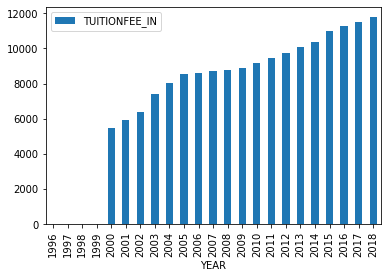

In [58]:
df_jhu=df_jhu.sort_values(by='YEAR')
df_jhu.plot(x="YEAR", y=["TUITIONFEE_IN"], kind="bar")

In [40]:
fig = go.Figure()

trace_jhu = go.Line(
    x=df_jhu["YEAR"],
    y=df_jhu["TUITIONFEE_IN"]
)
fig.add_trace(trace_jhu)

fig.update_layout(
    title="JHU",
    xaxis={"title":"year"},
    yaxis={"title":"instate tution fee"}
)


fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




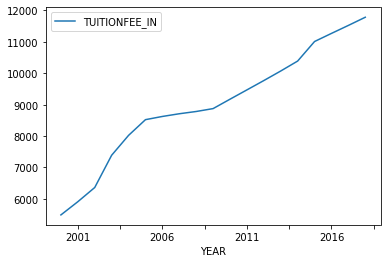

In [59]:
df_jhu=df_jhu.sort_values(by='YEAR')
df_jhu.plot(x="YEAR", y=["TUITIONFEE_IN"], kind="line")

## <15> & <16>
## Let's calculate the JHU tuition percentge growth using the function defined earlier

## Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

In [41]:
pct_change(df_jhu)
df_jhu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.13
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.50
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.89
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.91
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.91


## <17> Make a bar plot of the JHU percentage changes tuitions over time

In [42]:
fig = go.Figure()

trace_jhu = go.Bar(
    x=df_jhu["YEAR"],
    y=df_jhu["PCT_CHANGE"]
)
fig.add_trace(trace_jhu)

fig.update_layout(
    title="JHU",
    xaxis={"title":"year"},
    yaxis={"title":"percentage growth"}
)


fig.show()


In [43]:
fig = go.Figure()

trace_jhu = go.Line(
    x=df_jhu["YEAR"],
    y=df_jhu["PCT_CHANGE"]
)
fig.add_trace(trace_jhu)

fig.update_layout(
    title="JHU",
    xaxis={"title":"year"},
    yaxis={"title":"percentage growth"}
)


fig.show()


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## <18>
## In order to plot both UMBC and JHU tuition change over time in the same plot,
## we need to combine the two datasets using the common key of YEAR 
## First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
## Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
## This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
## We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
## Feel free to try it without changing the column names.

In [44]:
df_umbc = df3[["YEAR","PCT_CHANGE"]]
df_umbc.rename(columns={'PCT_CHANGE':'UMBC_PCT'}, inplace=True)
df_umbc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YEAR,UMBC_PCT
2151,1996,NaN
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN
1915,2001,7.65
1893,2002,7.65
1873,2003,16.13
1830,2004,8.55
1819,2005,6.23


## Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
## Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

In [45]:
df_jhu1 = df_jhu[["YEAR","PCT_CHANGE"]]
df_jhu1.rename(columns={'PCT_CHANGE':'JHU_PCT'}, inplace=True)
df_jhu1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YEAR,JHU_PCT
2139,1996,NaN
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN
1906,2001,5.13
1884,2002,4.50
1865,2003,4.89
1823,2004,4.91
1812,2005,4.91


## Now, merger the two data frames
## and display the new dataframe

In [46]:
df_pctchange_mrge = pd.merge(
    left = df_umbc, 
    right = df_jhu1, 
    left_on = 'YEAR', 
    right_on='YEAR'
    )
df_pctchange_mrge

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,5.13
6,2002,7.65,4.50
7,2003,16.13,4.89
8,2004,8.55,4.91
9,2005,6.23,4.91


## Plot UMBC and JHU separately on the same plot 
## However, this does not work since the bars overlap.


In [47]:
fig = go.Figure()

trace_merged = go.Bar(
    x=df_pctchange_mrge["YEAR"],
    y=df_pctchange_mrge['UMBC_PCT'],
    name="UMBC"
)

trace_merged1 = go.Bar(
    x=df_pctchange_mrge["YEAR"],
    y=df_pctchange_mrge['JHU_PCT'],
    name="JHU"
)

fig.add_trace(trace_merged)
fig.add_trace(trace_merged1)


fig.update_layout(
    title="UMBC vs JHU",
    xaxis={"title":"Year"},
    yaxis={"title":"percentage change"}
)

fig.show()

In [48]:
fig = go.Figure()

trace_merged = go.Line(
    x=df_pctchange_mrge["YEAR"],
    y=df_pctchange_mrge['UMBC_PCT'],
    name="UMBC"
)

trace_merged1 = go.Line(
    x=df_pctchange_mrge["YEAR"],
    y=df_pctchange_mrge['JHU_PCT'],
    name="JHU"
)

fig.add_trace(trace_merged)
fig.add_trace(trace_merged1)


fig.update_layout(
    title="UMBC vs JHU",
    xaxis={"title":"Year"},
    yaxis={"title":"percentage change"}
)

fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## <19> 
## document your observation/conclusion of the comparison plots (bar/line)
## use the following Markdown cell

- Initially it is observed that the percentage change in the tution fee of UMBC is 7.65 for the year 2001 whereas for JHU it is 5.13. the difference between them is 2.52
- The highest difference in percentage changes between UMBC and JHU was observed in the year 2003 with 11.24
- The least difference was observed in the year 2012 with 0.51
- It is observed that UMBC has a highest percentage change in its tution fees where as JHU maintains some consistency in its tution fees because we see minor changes.

## The end.